# Airpollution data for leeds from texmex package

In [1]:
library(texmex)
library(ggplot2)
library(dplyr)
library(tibble)
library(maxstablePCA)

Loading required package: mvtnorm

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
summer <- as_tibble(summer)
head(summer)

O3,NO2,NO,SO2,PM10
<int>,<int>,<int>,<int>,<int>
32,48,94,8,27
29,49,86,6,25
32,34,16,20,32
32,35,79,9,22
33,50,108,11,24
27,58,92,16,26


# Basic overview data

In [3]:
summary(summer)

       O3          NO2               NO              SO2        
 Min.   : 8   Min.   :  9.00   Min.   :  4.00   Min.   :  0.00  
 1st Qu.:26   1st Qu.: 30.00   1st Qu.: 30.00   1st Qu.:  5.00  
 Median :31   Median : 36.00   Median : 47.00   Median :  8.00  
 Mean   :32   Mean   : 37.63   Mean   : 55.20   Mean   : 17.37  
 3rd Qu.:36   3rd Qu.: 45.00   3rd Qu.: 71.75   3rd Qu.: 15.00  
 Max.   :84   Max.   :105.00   Max.   :256.00   Max.   :313.00  
      PM10       
 Min.   :  9.00  
 1st Qu.: 26.00  
 Median : 34.00  
 Mean   : 41.12  
 3rd Qu.: 50.00  
 Max.   :185.00  

4 columns of gasses in ppb, PM10 is column of particle matters in microgram/m^3

# Transform to unit Fréchet and look at bivariate plots

Plots are on the following slides :)

In [4]:
summer_trafo <- transform_unitfrechet(summer) %>% as_tibble()

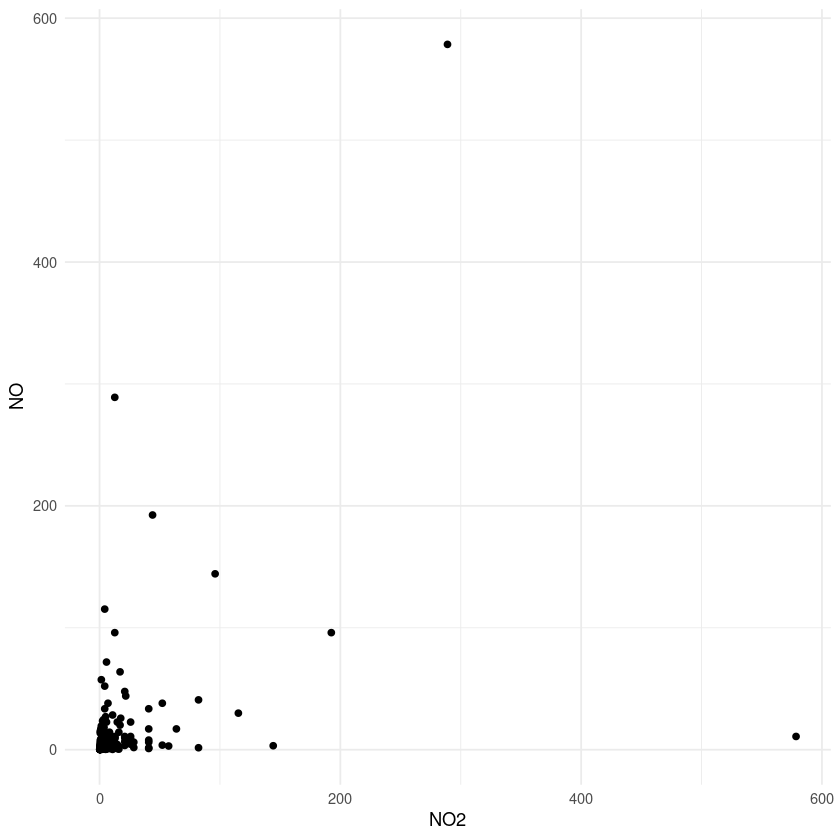

In [5]:
ggplot(summer_trafo, aes(x = NO2, y = NO)) +
geom_point() + 
theme_minimal()

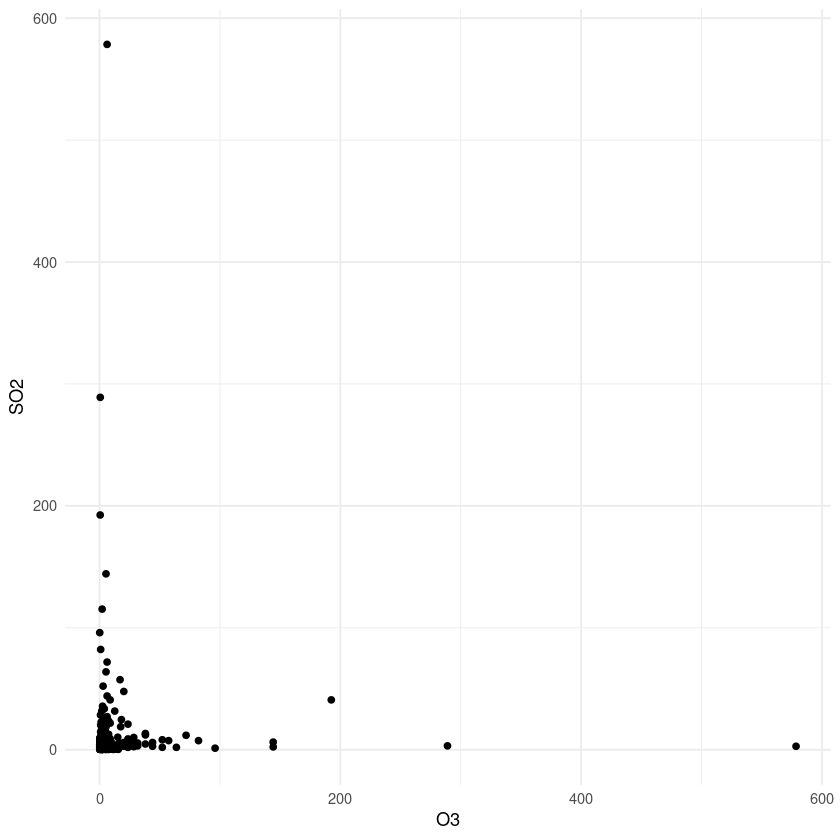

In [6]:
ggplot(summer_trafo, aes(x = O3, y = SO2)) +
geom_point() + 
theme_minimal()

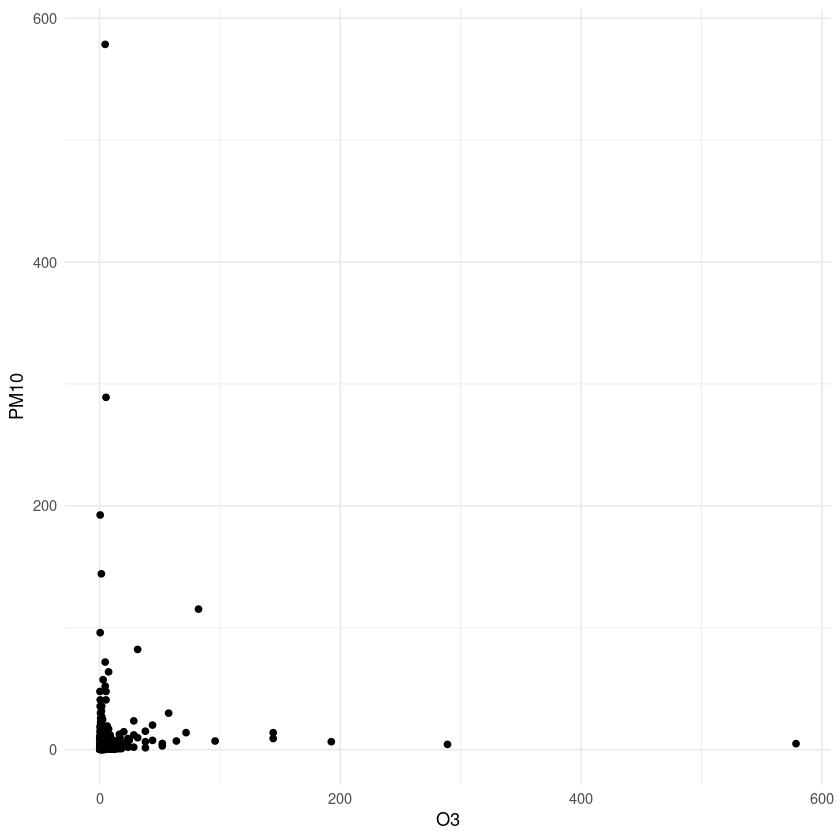

In [7]:
ggplot(summer_trafo, aes(x = O3, y = PM10)) +
geom_point() + 
theme_minimal()

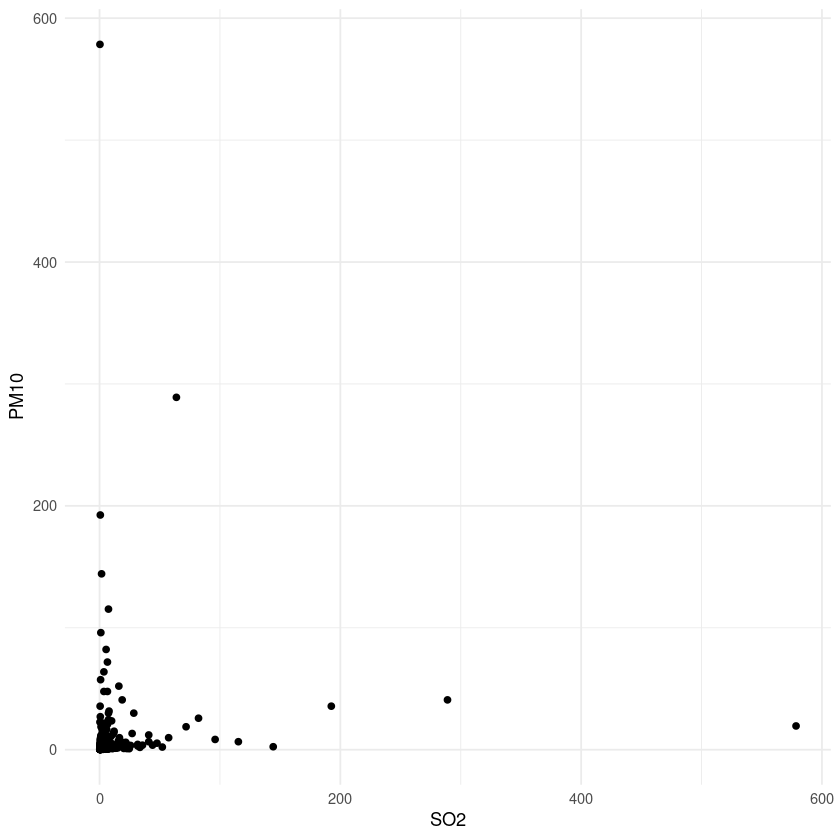

In [8]:
ggplot(summer_trafo, aes(x = SO2, y = PM10)) +
geom_point() + 
theme_minimal()

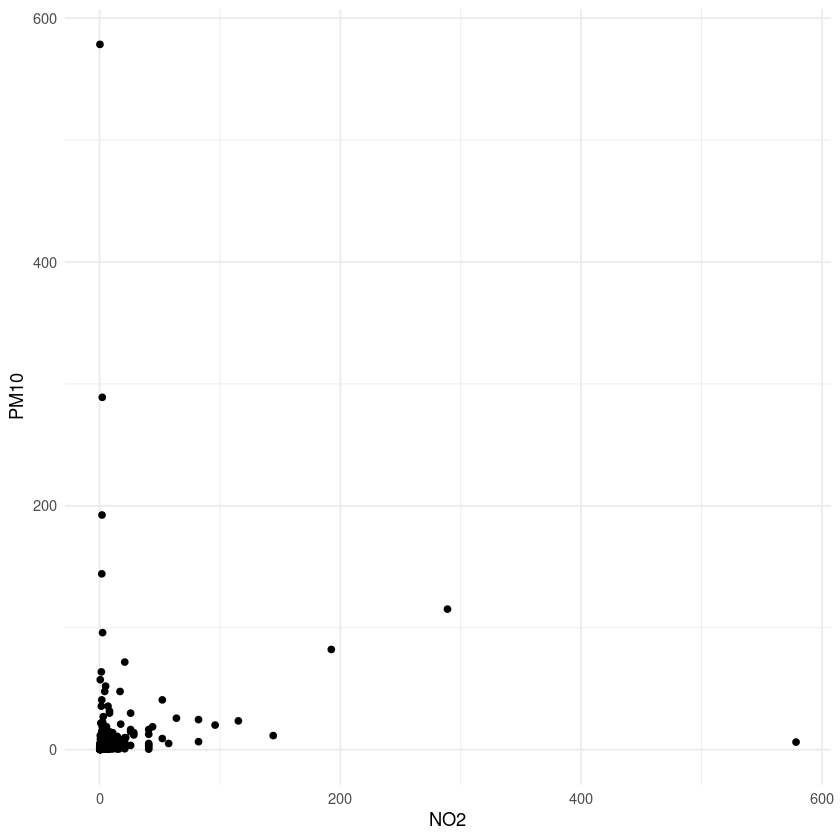

In [9]:
ggplot(summer_trafo, aes(x = NO2, y = PM10)) +
geom_point() + 
theme_minimal()

# Since dataset is reasonably small, fit max stable PCA's with p = 1,...,4 to the data

In [10]:
maxPCA1 <- max_stable_prcomp(summer_trafo, p = 1, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [11]:
maxPCA2 <- max_stable_prcomp(summer_trafo, p = 2, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [12]:
maxPCA3 <- max_stable_prcomp(summer_trafo, p = 3, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [13]:
maxPCA4 <- max_stable_prcomp(summer_trafo, p = 4, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



# Taking note of the encoder matrix can give clues on causal relationships

In [14]:
maxPCA1

$p
[1] 1

$d
[1] 5

$decoder_matrix
          [,1]
[1,] 0.7130168
[2,] 4.3347407
[3,] 1.1268525
[4,] 0.1228095
[5,] 0.8880728

$encoder_matrix
            [,1]      [,2]        [,3]         [,4]         [,5]
[1,] 0.001308781 0.2306943 0.009374207 0.0005675352 8.033958e-05

$reconstr_matrix
             [,1]       [,2]        [,3]         [,4]         [,5]
[1,] 0.0009331827 0.16448892 0.006683967 4.046621e-04 5.728347e-05
[2,] 0.0056732255 1.00000005 0.040634756 2.460118e-03 3.482512e-04
[3,] 0.0014748030 0.25995848 0.010563349 6.395285e-04 9.053086e-05
[4,] 0.0001607307 0.02833144 0.001151241 6.969869e-05 9.866460e-06
[5,] 0.0011622926 0.20487334 0.008324978 5.040126e-04 7.134739e-05

$loss_fctn_value
[1] 4.493793

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [15]:
maxPCA2

$p
[1] 2

$d
[1] 5

$decoder_matrix
            [,1]        [,2]
[1,] 0.970672786 0.001573571
[2,] 0.008475254 0.005697498
[3,] 0.001842172 0.006923644
[4,] 0.010543680 0.002028781
[5,] 0.007996024 0.602302099

$encoder_matrix
           [,1]        [,2]         [,3]        [,4]        [,5]
[1,] 1.03021409 0.004090002 0.0005504734 0.002136816 0.002863505
[2,] 0.01358826 0.016168112 0.0034834707 0.029418250 1.660295246

$reconstr_matrix
            [,1]         [,2]         [,3]         [,4]        [,5]
[1,] 1.000000783 3.970054e-03 5.343296e-04 2.074149e-03 0.002779526
[2,] 0.008731326 9.211778e-05 1.984707e-05 1.676104e-04 0.009459528
[3,] 0.001897831 1.119422e-04 2.411831e-05 2.036815e-04 0.011495293
[4,] 0.010862248 4.312367e-05 7.067200e-06 5.968319e-05 0.003368376
[5,] 0.008237617 9.738088e-03 2.098102e-03 1.771867e-02 0.999999312

$loss_fctn_value
[1] 3.327071

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [16]:
maxPCA3

$p
[1] 3

$d
[1] 5

$decoder_matrix
            [,1]         [,2]        [,3]
[1,] 0.006889706 0.0018067211 1.030714527
[2,] 1.076651721 0.0005783342 0.007379138
[3,] 0.279867126 0.0003893803 0.001706081
[4,] 0.030082563 0.0022546808 0.011238629
[5,] 0.011351174 0.6899093638 0.004152475

$encoder_matrix
            [,1]        [,2]        [,3]        [,4]         [,5]
[1,] 0.007159137 0.928782130 0.030960797 0.004063409 0.0007278339
[2,] 0.007992038 0.014733486 0.033973434 0.023277048 1.4494653126
[3,] 0.970221147 0.002006618 0.000589516 0.001729594 0.0016094675

$reconstr_matrix
            [,1]        [,2]         [,3]         [,4]         [,5]
[1,] 1.000021031 0.006399035 0.0006076228 0.0017827179 0.0026187795
[2,] 0.007707897 0.999974879 0.0333339956 0.0043748768 0.0008382754
[3,] 0.002003607 0.259935585 0.0086649093 0.0011372147 0.0005643933
[4,] 0.010903956 0.027940147 0.0009313801 0.0001222378 0.0032680816
[5,] 0.005513782 0.010542768 0.0234385903 0.0160590537 0.9999996917

$los

In [17]:
maxPCA4

$p
[1] 4

$d
[1] 5

$decoder_matrix
             [,1]         [,2]         [,3]        [,4]
[1,] 0.0005709173 0.0026949036 0.5237258904 0.005441797
[2,] 0.0252185322 0.0005570397 0.0030863113 0.713009395
[3,] 0.9280143317 0.0082928229 0.0005497433 0.005816972
[4,] 0.0082353584 1.2538783003 0.0015585439 0.001678123
[5,] 0.0907833126 0.1772628323 0.0068049312 0.007668780

$encoder_matrix
            [,1]        [,2]        [,3]        [,4]         [,5]
[1,] 0.001250197 0.015618767 1.077569609 0.007457594 0.0005917491
[2,] 0.003866324 0.002331492 0.010047049 0.797520311 0.0004592751
[3,] 1.909381258 0.008311071 0.001100407 0.003835472 0.0055469102
[4,] 0.010615952 1.402505646 0.024763279 0.007867089 0.0007737736

$reconstr_matrix
            [,1]        [,2]         [,3]        [,4]         [,5]
[1,] 0.999992399 0.007632150 0.0006152032 0.002149240 2.905060e-03
[2,] 0.007569274 0.999999702 0.0271747239 0.005609309 5.517078e-04
[3,] 0.001160200 0.014494440 1.0000000407 0.006920754 5.491516

# Creating something like a screeplot is possible with the loss and increasing p

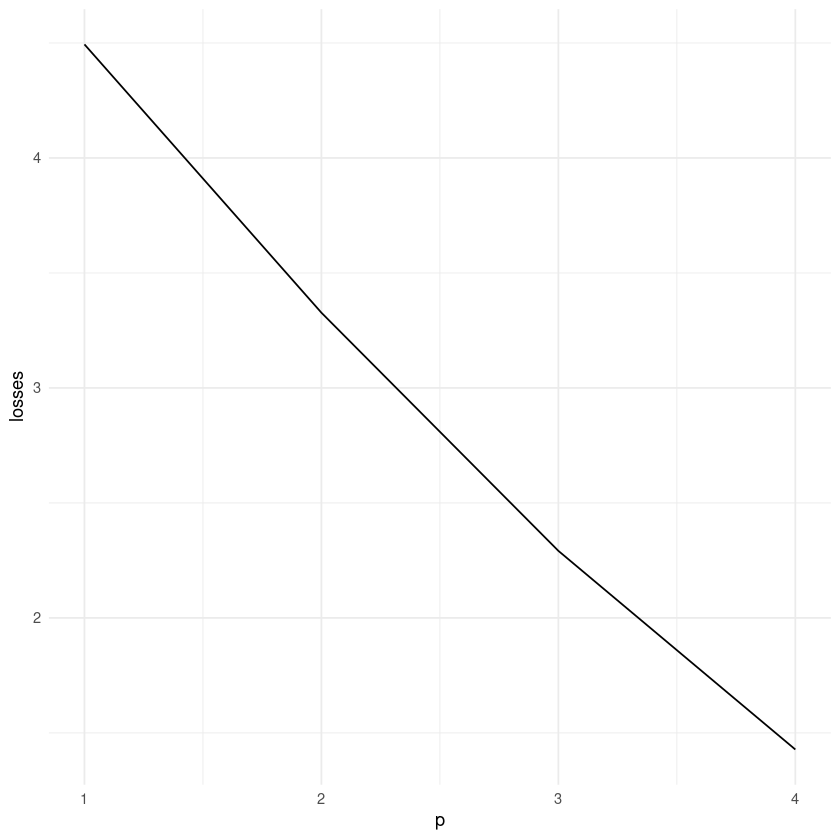

In [18]:
error_vals <- c(
    maxPCA1$loss_fctn_value,
    maxPCA2$loss_fctn_value,
    maxPCA3$loss_fctn_value,
    maxPCA4$loss_fctn_value
)

scree_df <- data.frame(p = 1:4, losses = error_vals) %>% as_tibble()

ggplot(scree_df, aes(x = p, y = losses)) + 
geom_line() + 
theme_minimal()

# Doing the same for the winter data, there is supposed to be more dependence

In [19]:
winter <- winter %>% as_tibble()
head(winter)

O3,NO2,NO,SO2,PM10
<int>,<int>,<int>,<int>,<int>
27,50,112,13,34
27,51,126,13,29
15,43,90,21,33
9,71,470,44,101
20,51,167,48,30
8,50,211,16,44


# Visibly more dependence than in summer between NO's and PM10

Plots again on the following slides

In [20]:
winter_trafo <- transform_unitfrechet(winter) %>% as_tibble()

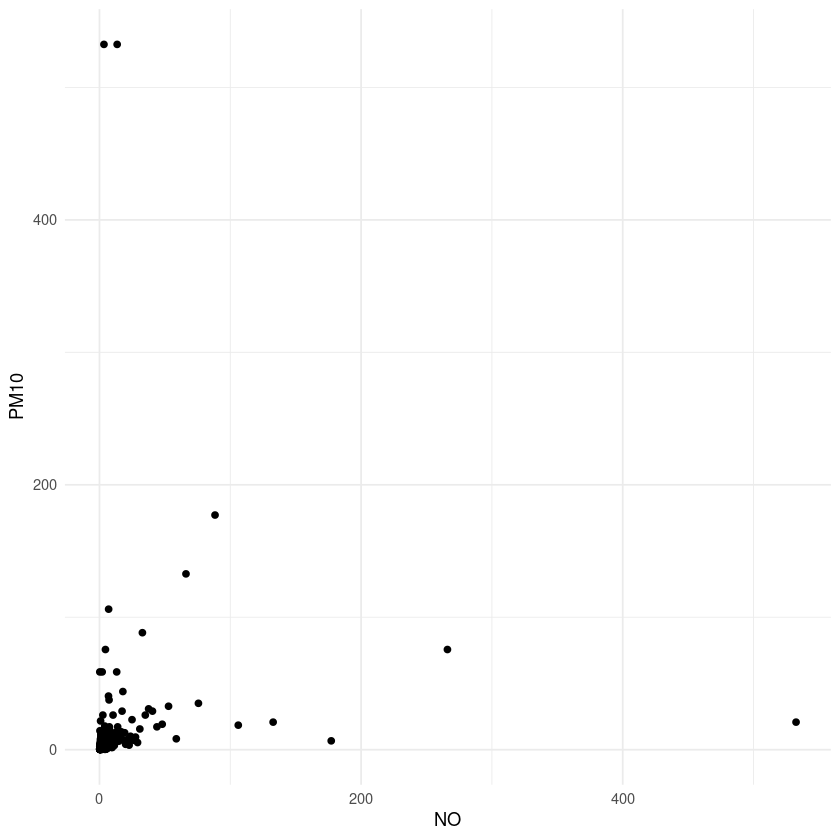

In [21]:
ggplot(winter_trafo, aes(x = NO, y = PM10)) +
geom_point() + 
theme_minimal()

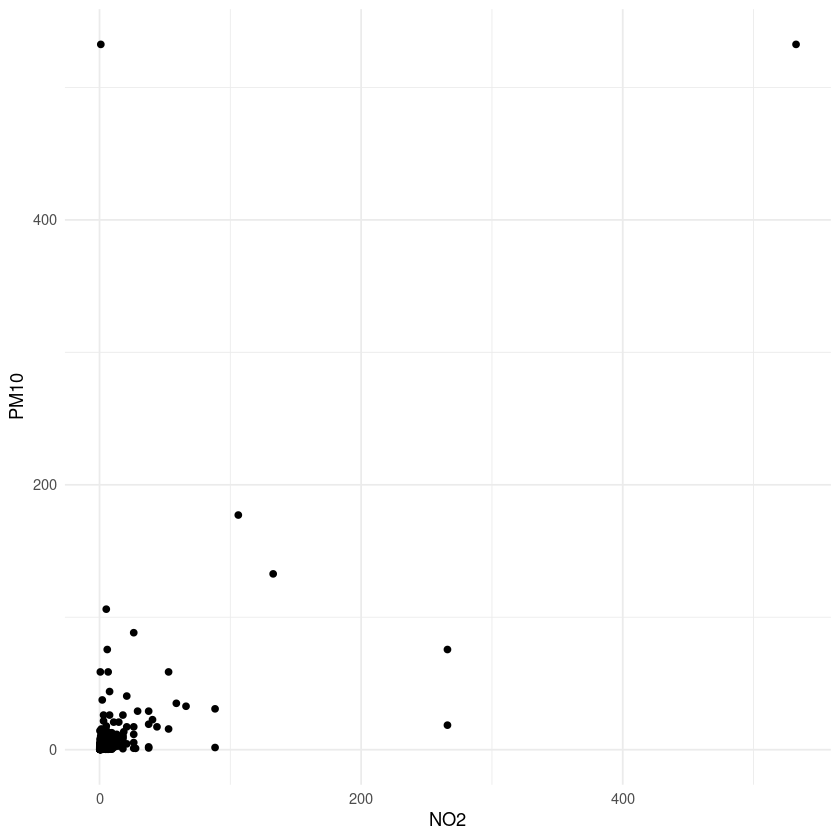

In [22]:
ggplot(winter_trafo, aes(x = NO2, y = PM10)) +
geom_point() + 
theme_minimal()

# Inspect closer by applying max stable PCA for p = 1,...,4 again

In [23]:
maxPCA_w1 <- max_stable_prcomp(winter_trafo, p = 1, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [24]:
maxPCA_w2 <- max_stable_prcomp(winter_trafo, p = 2, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [25]:
maxPCA_w3 <- max_stable_prcomp(winter_trafo, p = 3, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [26]:
maxPCA_w4 <- max_stable_prcomp(winter_trafo, p = 4, n_initial_guesses = 1000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



# Again look at loadings

In [27]:
maxPCA_w1

$p
[1] 1

$d
[1] 5

$decoder_matrix
           [,1]
[1,] 0.02094808
[2,] 4.75213639
[3,] 2.36708996
[4,] 0.09101317
[5,] 2.83497197

$encoder_matrix
             [,1]      [,2]       [,3]        [,4]        [,5]
[1,] 2.980203e-05 0.2104316 0.01331853 0.001405725 0.002711721

$reconstr_matrix
             [,1]        [,2]         [,3]         [,4]         [,5]
[1,] 6.242952e-07 0.004408136 0.0002789976 2.944723e-05 5.680534e-05
[2,] 1.416233e-04 0.999999479 0.0632914754 6.680196e-03 1.288647e-02
[3,] 7.054408e-05 0.498110436 0.0315261608 3.327477e-03 6.418887e-03
[4,] 2.712377e-06 0.019152044 0.0012121618 1.279395e-04 2.468023e-04
[5,] 8.448792e-05 0.596567577 0.0377576618 3.985191e-03 7.687653e-03

$loss_fctn_value
[1] 4.214856

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [28]:
maxPCA_w2

$p
[1] 2

$d
[1] 5

$decoder_matrix
             [,1]         [,2]
[1,] 0.6899829911 0.0007736364
[2,] 0.0005651368 0.9779021867
[3,] 0.0005288679 0.4871073660
[4,] 0.0015140859 0.0187279915
[5,] 0.0010197269 0.5833873725

$encoder_matrix
             [,1]        [,2]        [,3]        [,4]        [,5]
[1,] 1.4493117584 0.001221879 0.001730599 0.001324589 0.001049411
[2,] 0.0007032231 1.022598426 0.009363098 0.006840642 0.013198891

$reconstr_matrix
             [,1]        [,2]        [,3]         [,4]         [,5]
[1,] 1.0000004620 0.000843076 0.001194084 0.0009139438 0.0007240755
[2,] 0.0008190593 1.000001237 0.009156194 0.0066894788 0.0129072241
[3,] 0.0007664945 0.498115226 0.004560834 0.0033321271 0.0064292769
[4,] 0.0021943825 0.019151215 0.000175352 0.0001281115 0.0002471887
[5,] 0.0014779022 0.596571009 0.005462313 0.0039907442 0.0077000662

$loss_fctn_value
[1] 3.229728

$optim_conv_status
[1] 4

$s
[1] 3

attr(,"class")
[1] "max_stable_prcomp"

In [29]:
maxPCA_w3

$p
[1] 3

$d
[1] 5

$decoder_matrix
             [,1]         [,2]         [,3]
[1,] 0.6040634039 0.0009978068 0.0017690448
[2,] 0.0077089474 0.6572124865 0.0242681252
[3,] 0.0004361531 0.0061317386 1.0364989063
[4,] 0.0013243801 0.0068232463 0.0861311095
[5,] 0.0004486637 1.0974198204 0.0005100118

$encoder_matrix
             [,1]        [,2]        [,3]         [,4]        [,5]
[1,] 1.6554553287 0.001426157 0.001152008 0.0009290759 0.001105789
[2,] 0.0003422329 0.032688501 0.004365555 0.0020448174 0.911228192
[3,] 0.0006627212 0.008222641 0.964786325 0.0029431827 0.005796132

$reconstr_matrix
             [,1]         [,2]        [,3]         [,4]         [,5]
[1,] 0.9999999808 0.0008614891 0.001706750 0.0005612208 0.0009092296
[2,] 0.0127618180 0.0214832912 0.023413555 0.0013438795 0.5988705456
[3,] 0.0007220320 0.0085227589 0.999999971 0.0030506057 0.0060076849
[4,] 0.0021924522 0.0007082252 0.083098117 0.0002534996 0.0062175343
[5,] 0.0007427428 0.0358730092 0.004790846 0.0022440

In [30]:
maxPCA_w4

$p
[1] 4

$d
[1] 5

$decoder_matrix
             [,1]        [,2]        [,3]         [,4]
[1,] 0.7942606797 0.001164235 0.001616980 0.0004535667
[2,] 0.0101698217 0.001882643 0.102800316 0.0027760154
[3,] 0.0005409590 0.006026484 0.926943069 0.0016134286
[4,] 0.0004671954 0.005100457 0.007933433 0.5468927990
[5,] 0.0007780373 0.998255550 0.033821944 0.0016256955

$encoder_matrix
             [,1]        [,2]       [,3]        [,4]        [,5]
[1,] 1.2590641193 0.001090976 0.00209911 0.001260388 0.001204454
[2,] 0.0008980894 0.051156227 0.01843238 0.003461296 1.001752076
[3,] 0.0006447361 0.020037796 1.07882357 0.002822066 0.006573239
[4,] 0.0008820584 0.018179111 0.01011652 1.828430335 0.009906896

$reconstr_matrix
             [,1]         [,2]        [,3]        [,4]        [,5]
[1,] 1.0000251232 0.0008665196 0.001744436 0.001001077 0.001166275
[2,] 0.0128044576 0.0020598917 0.110903404 0.005075751 0.001885941
[3,] 0.0006811021 0.0185738959 1.000008031 0.002950042 0.006093018
[4,] 0

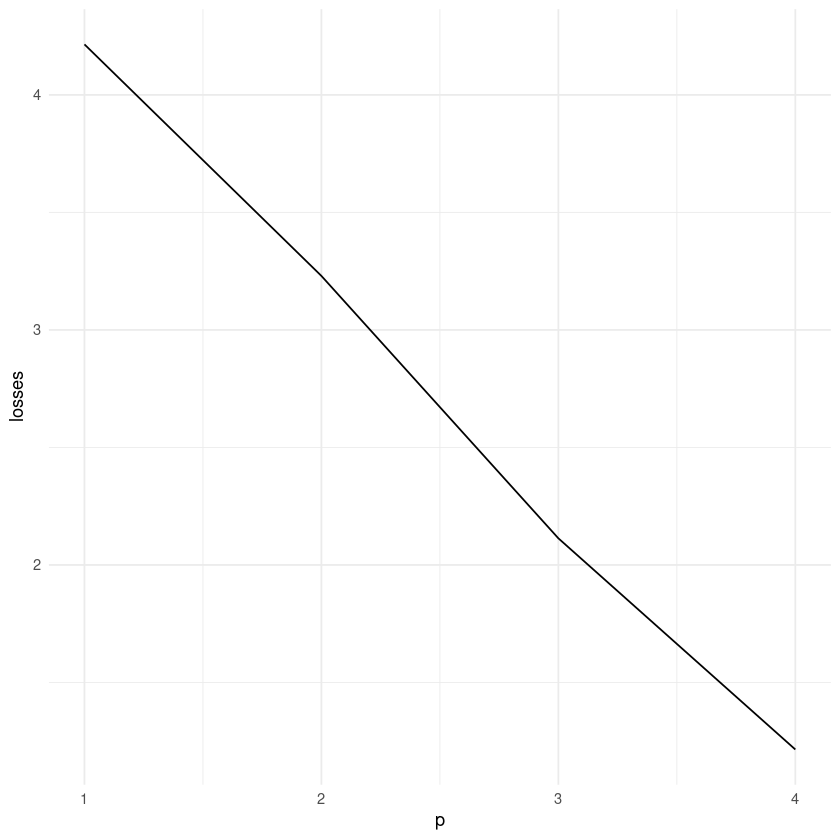

In [31]:
error_vals_w <- c(
    maxPCA_w1$loss_fctn_value,
    maxPCA_w2$loss_fctn_value,
    maxPCA_w3$loss_fctn_value,
    maxPCA_w4$loss_fctn_value
)

scree_w_df <- data.frame(p = 1:4, losses = error_vals_w) %>% as_tibble()

ggplot(scree_w_df, aes(x = p, y = losses)) + 
geom_line() + 
theme_minimal()